Task 1: Load the shapefile data using GeoPandas and preprocess the data (15 pts)

In [ ]:
!pip install GeoPandas

     |████████████████████████████████| 1.0MB 10.3MB/s 
     |████████████████████████████████| 6.5MB 46.5MB/s 
     |████████████████████████████████| 14.8MB 327kB/s 


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import geopandas as gpd

(1) Remove artificial values (5 pts).

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f18d6db34d0>,
      dtype=object)

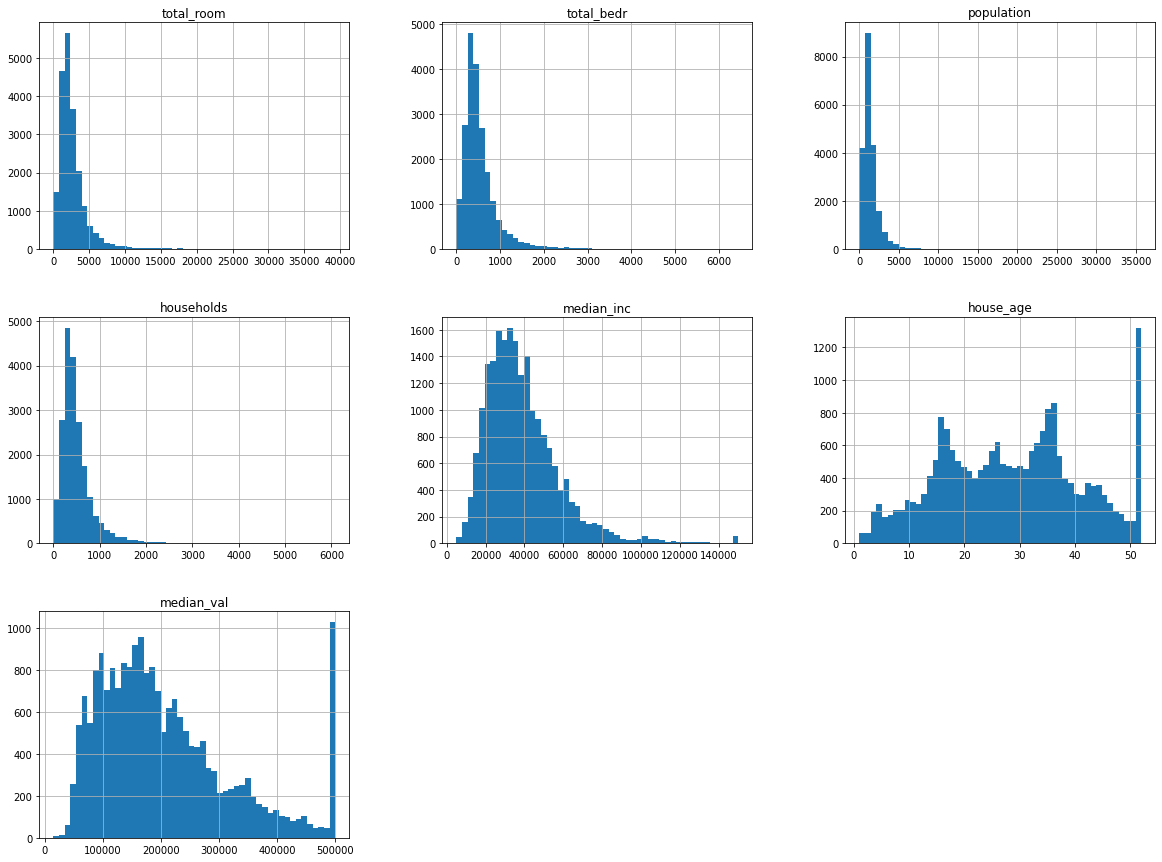

In [ ]:
housing_shp = gpd.read_file("/content/drive/MyDrive/lab geo ai 503 /data/lab1/california_housing.shp")
housing_shp.hist(bins=50, figsize=(20,15))

In [ ]:
age_max = housing_shp["house_age"].max()
medi_max = housing_shp["median_val"].max()
housing_shp_cleaned = housing_shp[housing_shp["house_age"] < age_max]
housing_shp_cleaned = housing_shp_cleaned[housing_shp_cleaned["median_val"] < medi_max]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f18d14dcc50>,
      dtype=object)

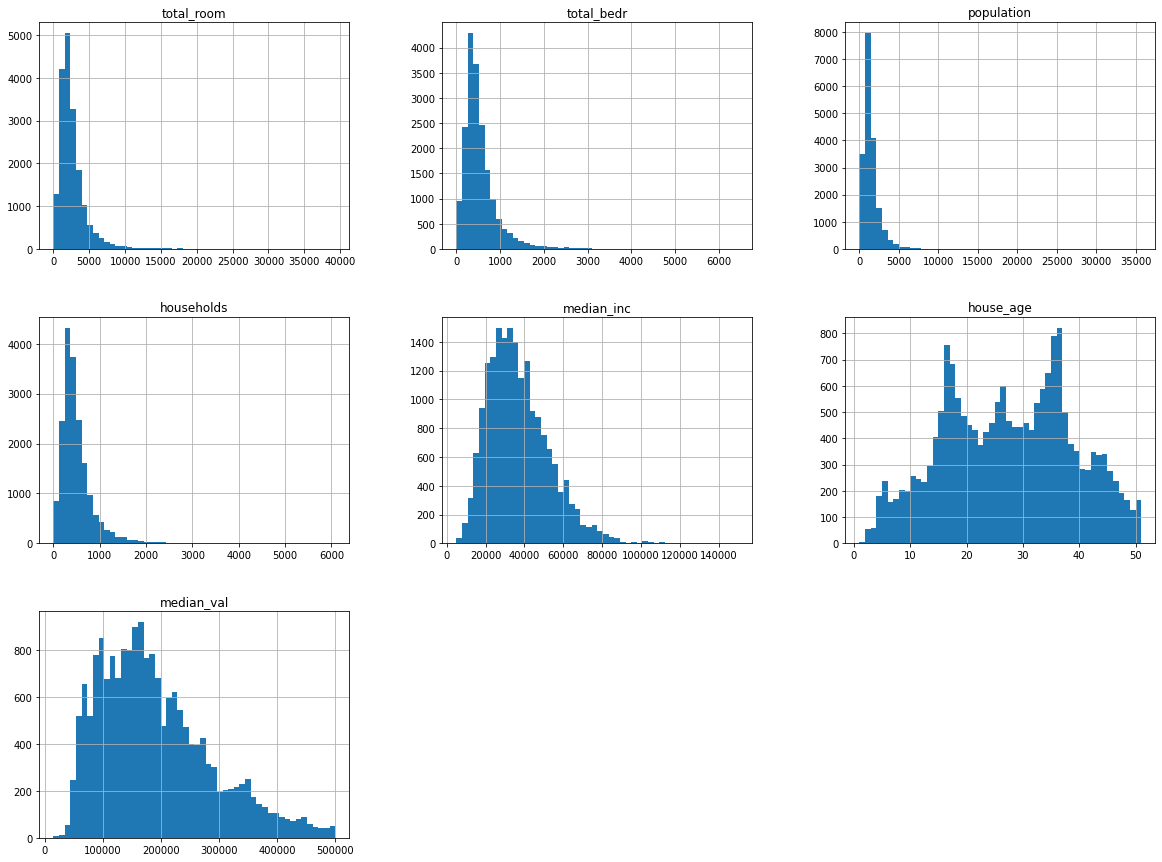

In [ ]:
housing_shp_cleaned.hist(bins=50, figsize=(20,15))

(2) Prepare dummy variables (5 pts).

In [ ]:
import pandas as pd

In [ ]:
housing_shp["ocean_prox"].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [ ]:
housing_shp_cleaned = pd.get_dummies(housing_shp_cleaned)
housing_shp_cleaned.head()

,total_room,total_bedr,population,households,median_inc,house_age,median_val,geometry,ocean_prox_<1H OCEAN,ocean_prox_INLAND,ocean_prox_ISLAND,ocean_prox_NEAR BAY,ocean_prox_NEAR OCEAN
0,880.0,129.0,322.0,126.0,83252.0,41.0,452600.0,POINT (-122.23000 37.88000),0,0,0,1,0
1,7099.0,1106.0,2401.0,1138.0,83014.0,21.0,358500.0,POINT (-122.22000 37.86000),0,0,0,1,0
8,2555.0,665.0,1206.0,595.0,20804.0,42.0,226700.0,POINT (-122.26000 37.84000),0,0,0,1,0
15,1120.0,283.0,697.0,264.0,21250.0,50.0,140000.0,POINT (-122.26000 37.85000),0,0,0,1,0
18,2239.0,455.0,990.0,419.0,19911.0,50.0,158700.0,POINT (-122.26000 37.84000),0,0,0,1,0


(3) Extract latitude and longitude as two additional features from the geometry column, and then remove the geometry column (5 pts)

In [ ]:
housing_shp_cleaned["lat"] = housing_shp_cleaned["geometry"].y
housing_shp_cleaned["lng"] = housing_shp_cleaned["geometry"].x
housing_shp_cleaned.head()

,total_room,total_bedr,population,households,median_inc,house_age,median_val,geometry,ocean_prox_<1H OCEAN,ocean_prox_INLAND,ocean_prox_ISLAND,ocean_prox_NEAR BAY,ocean_prox_NEAR OCEAN,lat,lng
0,880.0,129.0,322.0,126.0,83252.0,41.0,452600.0,POINT (-122.23000 37.88000),0,0,0,1,0,37.88,-122.23
1,7099.0,1106.0,2401.0,1138.0,83014.0,21.0,358500.0,POINT (-122.22000 37.86000),0,0,0,1,0,37.86,-122.22
8,2555.0,665.0,1206.0,595.0,20804.0,42.0,226700.0,POINT (-122.26000 37.84000),0,0,0,1,0,37.84,-122.26
15,1120.0,283.0,697.0,264.0,21250.0,50.0,140000.0,POINT (-122.26000 37.85000),0,0,0,1,0,37.85,-122.26
18,2239.0,455.0,990.0,419.0,19911.0,50.0,158700.0,POINT (-122.26000 37.84000),0,0,0,1,0,37.84,-122.26


In [ ]:
housing_shp_cleaned = housing_shp_cleaned[["total_room",	"total_bedr",	"population",	"households",	"median_inc",	"house_age",	"median_val",	"ocean_prox_<1H OCEAN",	"ocean_prox_INLAND",	"ocean_prox_ISLAND",	"ocean_prox_NEAR BAY",	"ocean_prox_NEAR OCEAN",	"lat",	"lng"]]
housing_shp_cleaned.head()

,total_room,total_bedr,population,households,median_inc,house_age,median_val,ocean_prox_<1H OCEAN,ocean_prox_INLAND,ocean_prox_ISLAND,ocean_prox_NEAR BAY,ocean_prox_NEAR OCEAN,lat,lng
0,880.0,129.0,322.0,126.0,83252.0,41.0,452600.0,0,0,0,1,0,37.88,-122.23
1,7099.0,1106.0,2401.0,1138.0,83014.0,21.0,358500.0,0,0,0,1,0,37.86,-122.22
8,2555.0,665.0,1206.0,595.0,20804.0,42.0,226700.0,0,0,0,1,0,37.84,-122.26
15,1120.0,283.0,697.0,264.0,21250.0,50.0,140000.0,0,0,0,1,0,37.85,-122.26
18,2239.0,455.0,990.0,419.0,19911.0,50.0,158700.0,0,0,0,1,0,37.84,-122.26


Task 2: Split your data into training (80%) and test (20%) (10 pts)

In [ ]:
random_state = 42
training_data = housing_shp_cleaned.sample(frac=0.8, random_state=42)  
test_data = housing_shp_cleaned.drop(training_data.index)

In [ ]:
#remove dummy variables and housing prices
training_data2 = training_data[["total_room",	"total_bedr",	"population",	"households",	"median_inc",	"house_age",	"lat",	"lng"]]
test_data2 = test_data[["total_room",	"total_bedr",	"population",	"households",	"median_inc",	"house_age",	"lat",	"lng"]]

In [ ]:
# standarize data
training_stat = training_data2.describe().transpose()

In [ ]:
def standarize_data(data, stats):
    return (data - stats['mean'])/ stats['std']

In [ ]:
training_data_stded = standarize_data(training_data2, training_stat)
test_data_stded = standarize_data(test_data2, training_stat)

In [ ]:
training_data_stded.head()

,total_room,total_bedr,population,households,median_inc,house_age,lat,lng
12869,0.964632,0.904149,1.172344,1.010080,0.153464,-1.741332,1.446264,-0.951464
8961,-0.921094,-0.929979,-0.928878,-0.954240,0.639229,1.135903,-0.733787,0.549876
20309,-0.468857,-0.477193,-0.032942,-0.439715,0.715341,-0.433498,-0.664062,0.172022
17392,-0.242961,-0.222070,0.626331,-0.115285,0.235446,-0.520687,-0.296847,-0.482925
6961,0.382804,0.488137,0.120888,0.477813,-0.290512,0.787147,-0.747732,0.731246


In [ ]:
test_data_stded.head()

,total_room,total_bedr,population,households,median_inc,house_age,lat,lng
21,-0.456875,-0.401346,-0.457244,-0.361142,-1.261787,1.310281,1.046510,-1.399851
25,-0.946835,-0.962157,-0.974520,-0.987190,-0.821383,1.223092,1.046510,-1.404889
28,-0.260269,-0.114045,-0.286509,-0.089939,-1.307148,2.007792,1.041862,-1.404889
32,-0.331278,-0.304813,-0.375257,-0.439715,-1.208579,1.833415,1.041862,-1.399851
34,-0.001531,0.074424,-0.179166,0.069741,-0.613080,2.094981,1.037214,-1.399851


In [ ]:
#collect dummy variables
training_ocean_cols = training_data[["ocean_prox_<1H OCEAN", "ocean_prox_INLAND", "ocean_prox_ISLAND",	"ocean_prox_NEAR BAY",	"ocean_prox_NEAR OCEAN"]]
test_ocean_cols = test_data[["ocean_prox_<1H OCEAN", "ocean_prox_INLAND", "ocean_prox_ISLAND",	"ocean_prox_NEAR BAY",	"ocean_prox_NEAR OCEAN"]]

In [ ]:
#combine standardized data with dummy variables
training_data_x = pd.concat([training_data_stded, training_ocean_cols], axis=1)
test_data_x = pd.concat([test_data_stded, test_ocean_cols], axis=1)

In [ ]:
training_data_x.head()

,total_room,total_bedr,population,households,median_inc,house_age,lat,lng,ocean_prox_<1H OCEAN,ocean_prox_INLAND,ocean_prox_ISLAND,ocean_prox_NEAR BAY,ocean_prox_NEAR OCEAN
12869,0.964632,0.904149,1.172344,1.010080,0.153464,-1.741332,1.446264,-0.951464,0,1,0,0,0
8961,-0.921094,-0.929979,-0.928878,-0.954240,0.639229,1.135903,-0.733787,0.549876,1,0,0,0,0
20309,-0.468857,-0.477193,-0.032942,-0.439715,0.715341,-0.433498,-0.664062,0.172022,0,0,0,0,1
17392,-0.242961,-0.222070,0.626331,-0.115285,0.235446,-0.520687,-0.296847,-0.482925,1,0,0,0,0
6961,0.382804,0.488137,0.120888,0.477813,-0.290512,0.787147,-0.747732,0.731246,1,0,0,0,0


In [ ]:
test_data_x.head()

,total_room,total_bedr,population,households,median_inc,house_age,lat,lng,ocean_prox_<1H OCEAN,ocean_prox_INLAND,ocean_prox_ISLAND,ocean_prox_NEAR BAY,ocean_prox_NEAR OCEAN
21,-0.456875,-0.401346,-0.457244,-0.361142,-1.261787,1.310281,1.046510,-1.399851,0,0,0,1,0
25,-0.946835,-0.962157,-0.974520,-0.987190,-0.821383,1.223092,1.046510,-1.404889,0,0,0,1,0
28,-0.260269,-0.114045,-0.286509,-0.089939,-1.307148,2.007792,1.041862,-1.404889,0,0,0,1,0
32,-0.331278,-0.304813,-0.375257,-0.439715,-1.208579,1.833415,1.041862,-1.399851,0,0,0,1,0
34,-0.001531,0.074424,-0.179166,0.069741,-0.613080,2.094981,1.037214,-1.399851,0,0,0,1,0


Task 3: Build a 3-layer DNN model

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
training_label = training_data.pop('median_val')
test_label = test_data.pop("median_val")

In [ ]:
tf.random.set_seed(42)

dnn_model = keras.models.Sequential([
       keras.layers.Dense(128,activation="relu"),
       keras.layers.Dense(64,activation="relu"),
       keras.layers.Dense(1,activation="relu"),  
       keras.layers.Dense(1),                             
])

dnn_model.compile(optimizer="adam",loss=keras.losses.mean_squared_error, metrics=[keras.metrics.mean_squared_error])

history = dnn_model.fit(x=training_data_x, y=training_label, validation_split=0.2, epochs=100, verbose=0)

Task 4: Plot out the epoch-loss curve for training and validation (5 pts)

In [ ]:
import matplotlib.pyplot as plt
def plot_loss(history):
  plt.plot(history.history['loss'], label='training_loss')
  plt.plot(history.history['val_loss'], label='validation_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()
  plt.grid(True)

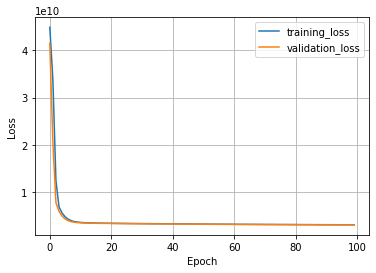

In [ ]:
plot_loss(history)

Task 5: Use the trained DNN model to predict the test data, and calculate the RMSE of the model. (10 pts)

In [ ]:
y_pred = dnn_model.predict(test_data_x)
y_pred

array([[130364.28],
       [149903.86],
       [146790.48],
       ...,
       [114002.35],
       [ 85541.77],
       [ 93928.73]], dtype=float32)

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
mean_squared_error(test_label,y_pred,squared=False)

55298.64864264678

Task 6: Hyperparameter tuning

In [ ]:
!pip install keras-tuner

     |████████████████████████████████| 71kB 5.4MB/s 
  Created wheel for keras-tuner: filename=keras_tuner-1.0.2-cp37-none-any.whl size=78938 sha256=d1bfe6f751f9438f4d0e2fc016c4fdd6bb608db3f3e59a12c9de6dce4ce5bd01
  Stored in directory: /root/.cache/pip/wheels/bb/a1/8a/7c3de0efb3707a1701b36ebbfdbc4e67aedf6d4943a1f463d6
  Created wheel for terminaltables: filename=terminaltables-3.1.0-cp37-none-any.whl size=15356 sha256=5cbd283500901655cbe12a0bcd402cf96a32b1fabc2afbb0bda0a29eba4fad83
  Stored in directory: /root/.cache/pip/wheels/30/6b/50/6c75775b681fb36cdfac7f19799888ef9d8813aff9e379663e
Successfully built keras-tuner terminaltables


In [ ]:
# Hyperparameter tuning

def build_model(hp):
  model = keras.models.Sequential()
  for i in range(hp.Int("num_layer",1,8)):
    model.add(keras.layers.Dense(units=hp.Int("neuron_"+str(i),16,128, step=32), activation="relu"))
  model.add(keras.layers.Dense(1))

  model.compile(optimizer="adam",loss=keras.losses.mean_squared_error, metrics=[keras.metrics.mean_squared_error])
  return model

In [ ]:
from kerastuner.tuners import RandomSearch
tuner = RandomSearch(build_model, objective="val_loss", max_trials=5, seed=42)
tuner.search(training_data_x, training_label, validation_split=0.2, epochs=10)

Trial 5 Complete [00h 00m 09s]
val_loss: 2948055296.0

Best val_loss So Far: 2937132544.0
Total elapsed time: 00h 00m 40s
INFO:tensorflow:Oracle triggered exit


In [ ]:
tuner.results_summary()

Results summary
Results in ./untitled_project
Showing 10 best trials
Objective(name='val_loss', direction='min')
Trial summary
Hyperparameters:
num_layer: 8
neuron_0: 16
neuron_1: 80
neuron_2: 48
neuron_3: 48
neuron_4: 80
neuron_5: 16
neuron_6: 16
neuron_7: 16
Score: 2937132544.0
Trial summary
Hyperparameters:
num_layer: 7
neuron_0: 80
neuron_1: 80
neuron_2: 48
neuron_3: 16
neuron_4: 16
neuron_5: 112
neuron_6: 80
neuron_7: 112
Score: 2948055296.0
Trial summary
Hyperparameters:
num_layer: 4
neuron_0: 48
neuron_1: 112
neuron_2: 80
neuron_3: 112
neuron_4: 16
Score: 3157359616.0
Trial summary
Hyperparameters:
num_layer: 4
neuron_0: 48
neuron_1: 112
neuron_2: 48
neuron_3: 80
neuron_4: 16
Score: 3158308864.0
Trial summary
Hyperparameters:
num_layer: 5
neuron_0: 16
neuron_1: 16
neuron_2: 16
neuron_3: 16
neuron_4: 16
Score: 3312388864.0


the best hyperparameters:
neuron_0: 80
neuron_1: 80
neuron_2: 48
neuron_3: 16
neuron_4: 16
neuron_5: 112
neuron_6: 80
neuron_7: 112

In [ ]:
dnn_model2 = keras.models.Sequential([
       keras.layers.Dense(80,activation="relu"),
       keras.layers.Dense(80,activation="relu"),
       keras.layers.Dense(48,activation="relu"),
       keras.layers.Dense(16,activation="relu"),
       keras.layers.Dense(16,activation="relu"),
       keras.layers.Dense(112,activation="relu"),
       keras.layers.Dense(80,activation="relu"),
       keras.layers.Dense(112,activation="relu"),
       keras.layers.Dense(1)
       ])

dnn_model2.compile(optimizer="adam",loss=keras.losses.mean_squared_error, metrics=[keras.metrics.mean_squared_error])

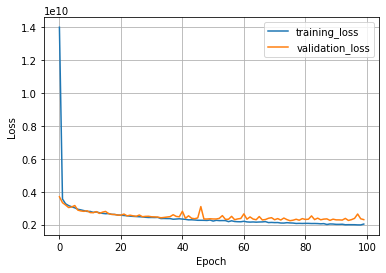

In [ ]:
history2 = dnn_model2.fit(x=training_data_x, y=training_label, validation_split=0.2, epochs=100, verbose=0)
plot_loss(history2)

In [ ]:
y_pred2 = dnn_model2.predict(test_data_x)
y_pred2

array([[ 94395.375],
       [105212.625],
       [104119.28 ],
       ...,
       [119986.29 ],
       [ 80758.36 ],
       [ 91400.45 ]], dtype=float32)

In [ ]:
mean_squared_error(test_label,y_pred2,squared=False)

45682.58080440348

Task 7: Result Plotting

In [ ]:
# Prediction scatter plot
plt.figure(figsize=(8,8))
plt.scatter(test_label, y_pred2, s=15, c='blue')
plt.xlabel("True Median Housing Price")
plt.ylabel("Predicted Median Housing Price")
lim = [0,600000]
plt.xlim(lim)
plt.ylim(lim)
refernce_line = plt.plot(lim,lim, "r-")